In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle as pkl
import os
from tqdm import tqdm_notebook
from scipy.ndimage import gaussian_filter1d

### Timeline creation

In [111]:
topics_path = '/mlo-container-scratch/massemin/twitter_covid_insights_v3/insights_All/topics.pkl'
#trends_path = '/mlo-container-scratch/massemin/twitter_covid_insights_v3/insights_All/trends_raw.pkl'
trends_path = '/mlo-container-scratch/massemin/twitter_covid_insights_v3/insights_All/new_trends.pkl'
piped_path="/mlo-container-scratch/massemin/tweets_piped"


topics = pkl.load(open(topics_path, 'rb'))[0]
trends = pkl.load(open(trends_path, 'rb'))[0]
raw_trends = trends.copy()

files = [f for f in  sorted(os.listdir(piped_path))]
piped_dates = [f.split('_')[1].split('.')[0] for f in files]

# Nb. of tweets per day for normalization
day_flux = []
for f in tqdm_notebook(files) :
    day_flux.append(len(pd.read_parquet(os.path.join(piped_path, f), columns=["sentiment"])))

# Normalize trends, drop 110 first for stability
for key in trends :
    trends[key] = gaussian_filter1d(trends[key], 2)
    trends[key] = (trends[key] / day_flux)[115:]
    trends[key] /= trends[key].sum()

trends = pd.DataFrame(trends)
trends = trends.drop([c for c in trends.columns if '-' in c], axis=1)


# Choose an event based on its highest value
events = trends.columns[trends.max(axis=0) > 0.05]

def find_peak(trend_idx) :
    date_idx = np.argmax(trends[trend_idx])
    date = piped_dates[115:][date_idx]
    return date_idx, date

# Compute events and save them 
results = []
for e in events :
    spikiness = trends[e].max()
    date_idx, date = find_peak(e)
    nb_tweets = raw_trends[e].sum()
    hashes = '-'.join(topics[int(e)])
    results.append((e, date, hashes, spikiness, nb_tweets, date_idx))



path = '/mlo-container-scratch/massemin/twitter_covid_insights_v3/insights_All/events.pkl'
#pkl.dump(sorted(results, key=lambda x : x[1]), open(path, 'wb'))

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  app.launch_new_instance()


  0%|          | 0/430 [00:00<?, ?it/s]

In [187]:
len(results)

209

In [205]:
[t for t in topics if '#housing' in topics[t]]

[208]

In [201]:
len(date_and_count), len(all_dates)

(315, 430)

In [204]:
topics

{0: array(['#msightly', '#watchnow', '#afaracare', '#minkcovid',
        '#lifeontheground', '#covidalertnj', '#watchlive', '#odishapolice',
        '#worldgovsummit'], dtype='<U75'),
 1: array(['#mobileapps', '#softwaredevelopment', '#thecube',
        '#enterprisetech', '#digitaltechnologies', '#cubeconversation'],
       dtype='<U75'),
 2: array(['#hairy', '#grindr', '#opendoor', '#puta', '#bubblebutt',
        '#opendoorchallenge', '#hiddencam', '#blindfolded', '#pollas'],
       dtype='<U75'),
 3: array(['#virtualassistant', '#datacollection', '#b2bsales', '#dataentry',
        '#b2bleadgeneration', '#webresearch', '#webscraping', '#copypaste',
        '#typing', '#b2bleads', '#datascraping', '#dataextraction'],
       dtype='<U75'),
 4: array(['#plandemic', '#scamdemic', '#nwo', '#wakeup', '#covidhoax',
        '#nomasks', '#covid1984', '#coronahoax', '#agenda21', '#event201',
        '#faucithefraud', '#scamdemic2020', '#greatreset',
        '#thegreatreset', '#faucifraud', '#pl

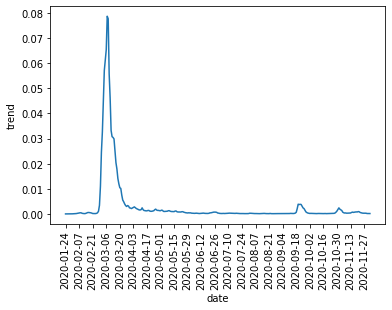

In [203]:
plt.plot(trends['626'])
plt.ylabel('trend')
plt.xlabel('date')
plt.xticks(np.arange(len(date_and_count[:, 0]))[::frequency], sorted(all_dates)[115:][::frequency], rotation=90)
plt.savefig('panic_buying_trend.png', dpi=800)

In [191]:
sorted(results, key=lambda x : -x[4])[:20]

[('100',
  '2020-07-28',
  '#hydroxychloroquine-#hcq-#hydroxycloroquine-#hydroxychloriquine-#zelenkoprotocol-#hydrochloroquine',
  0.05531253897904022,
  932375,
  186),
 ('717',
  '2020-01-26',
  '#coronaviruschina-#coronarvirus-#coronarovirus-#coronoavirus-#coronaviruswuhan-#coronavius-#coronarivus-#coronavavirus',
  0.07815159911714305,
  824301,
  2),
 ('348',
  '2020-02-22',
  '#coronavirusitalia-#covid19italia-#coronarvirusitalia-#coronavirusitalla-#coranavirusitalia-#codvid19italia',
  0.14034942218501958,
  340933,
  29),
 ('320',
  '2020-02-29',
  '#covid19nigeria-#coronavirusnigeria-#ncdc-#lagos-#coronavirusinnigeria-#buhari-#nigerians-#kano-#abuja',
  0.06002574841117617,
  234381,
  36),
 ('815',
  '2020-04-19',
  '#togetherathome-#blaqdeen-#teachmillions-#zaynnwfon-#fardeenblaq-#qualityeducationforkenya',
  0.15706452970462315,
  233327,
  86),
 ('442',
  '2020-02-09',
  '#cuba-#cubaporlasalud-#cubaessalud-#cuban-#cubacoopera-#dezurdateam-#unblockcuba-#havana-#cubavsbloque

In [80]:
len(big_results)

19

0 - 2020-08-02 - Amit shah infected with Covid - https://www.indiatoday.in/india/story/home-minister-amit-shah-tests-positive-for-coronavirus-covid19-1707029-2020-08-02
1 - 2020-07-19 - Jee and NEET examinations reported - https://www.hindustantimes.com/education/jee-neet-exams-2020-postponed-hrd-minister-announces-fresh-dates/story-E4dbgbeY6dQxAx09Jh2XdO.html

In [101]:
[t for t in topics if '#toiletpaper' in topics[t]]

[626]

In [109]:
np.array(files[115:])[trends['626'] > 0.015]

array(['parsed_2020-03-01.parquet', 'parsed_2020-03-02.parquet',
       'parsed_2020-03-03.parquet', 'parsed_2020-03-04.parquet',
       'parsed_2020-03-05.parquet', 'parsed_2020-03-06.parquet',
       'parsed_2020-03-07.parquet', 'parsed_2020-03-08.parquet',
       'parsed_2020-03-09.parquet', 'parsed_2020-03-10.parquet',
       'parsed_2020-03-11.parquet', 'parsed_2020-03-12.parquet',
       'parsed_2020-03-13.parquet', 'parsed_2020-03-14.parquet',
       'parsed_2020-03-15.parquet', 'parsed_2020-03-16.parquet',
       'parsed_2020-03-17.parquet'], dtype='<U25')

In [106]:
(trends['626'] > 0.015).sum()

17

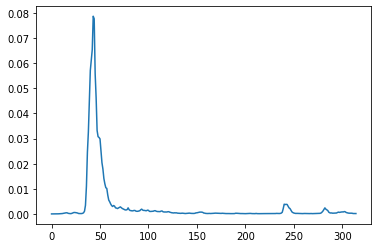

In [102]:
plt.plot(trends['626'])

In [113]:
x = pd.DataFrame(results, columns=['topic_id', 'date', 'hashtags', 'spikiness', 'nb_tweets', 'date_idx'])

In [117]:
x = x.drop('date_idx', axis=1)

In [126]:
x = x.sort_values(by=['date'])

In [132]:
all_dates = [f.split('.')[0].split('_')[-1] for f in files]

In [146]:
date_and_count = [(d, (x.date == d).sum()) for d in sorted(all_dates)[115:]]

In [147]:
date_and_count = np.array(date_and_count)

array([  0,   7,  14,  21,  28,  35,  42,  49,  56,  63,  70,  77,  84,
        91,  98, 105, 112, 119, 126, 133, 140, 147, 154, 161, 168, 175,
       182, 189, 196, 203, 210, 217, 224, 231, 238, 245, 252, 259, 266,
       273, 280, 287, 294, 301, 308])

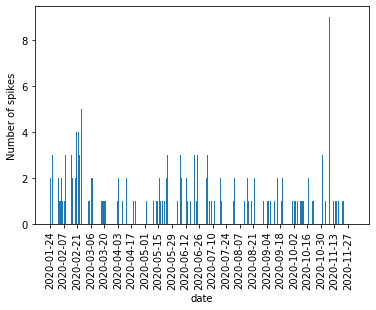

In [166]:
frequency=14
plt.bar(x=date_and_count[:, 0], height=date_and_count[:, 1].astype(int))
plt.xticks(np.arange(len(date_and_count[:, 0]))[::frequency], sorted(all_dates)[115:][::frequency], rotation=90)
plt.xlabel('date')
plt.ylabel('Number of spikes')
plt.show()

In [168]:
month_coarse = sorted(list(set([d[:-3] for d in date_and_count[:, 0]])))

In [175]:
nb_month_events = [sum([int(d[1]) for d in date_and_count if month in d[0]]) for month in month_coarse]


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], <a list of 11 Text xticklabel objects>)

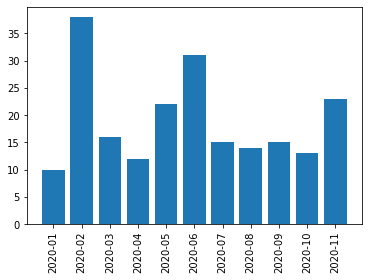

In [181]:
plt.bar(x=month_coarse[:-1], height=nb_month_events[:-1])
plt.xticks(rotation=90)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f97b007ac90>,
 'caps': [<matplotlib.lines.Line2D at 0x7f97b0075710>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f97b007a0d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f97b007ad50>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f97b0910690>],
 'means': []}

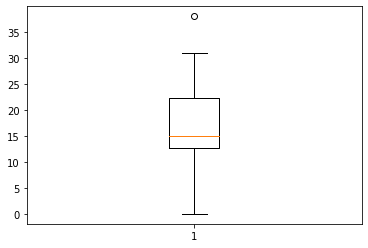

In [186]:
plt.boxplot(nb_month_events)

In [184]:
np.mean(nb_month_events)

17.416666666666668

In [130]:
dates

['2020-01-24',
 '2020-01-26',
 '2020-01-29',
 '2020-02-01',
 '2020-02-02',
 '2020-02-03',
 '2020-02-04',
 '2020-02-05',
 '2020-02-06',
 '2020-02-08',
 '2020-02-09',
 '2020-02-15',
 '2020-02-16',
 '2020-02-19',
 '2020-02-20',
 '2020-02-22',
 '2020-02-23',
 '2020-02-25',
 '2020-02-29',
 '2020-03-01',
 '2020-03-04',
 '2020-03-05',
 '2020-03-07',
 '2020-03-08',
 '2020-03-17',
 '2020-03-18',
 '2020-03-19',
 '2020-03-20',
 '2020-03-21',
 '2020-03-28',
 '2020-03-31',
 '2020-04-02',
 '2020-04-03',
 '2020-04-04',
 '2020-04-08',
 '2020-04-12',
 '2020-04-19',
 '2020-04-21',
 '2020-04-26',
 '2020-04-29',
 '2020-05-02',
 '2020-05-03',
 '2020-05-10',
 '2020-05-13',
 '2020-05-14',
 '2020-05-16',
 '2020-05-17',
 '2020-05-19',
 '2020-05-21',
 '2020-05-23',
 '2020-05-24',
 '2020-05-27',
 '2020-05-28',
 '2020-05-30',
 '2020-06-01',
 '2020-06-04',
 '2020-06-07',
 '2020-06-08',
 '2020-06-13',
 '2020-06-14',
 '2020-06-17',
 '2020-06-21',
 '2020-06-23',
 '2020-06-24',
 '2020-06-27',
 '2020-06-28',
 '2020-06-

In [129]:
x.date.value_counts().sort_index()

2020-01-24    2
2020-01-26    3
2020-01-29    5
2020-02-01    2
2020-02-02    2
             ..
2020-11-21    1
2020-11-22    1
2020-11-24    1
2020-11-25    1
2020-11-29    2
Name: date, Length: 121, dtype: int64

In [123]:
.to_csv('spikes.csv', index=False)

In [97]:
dates = sorted(set([x[1] for x in results]))

for d in dates :
    date_results = [r for r in results if r[1] == d]
        
    print(f'\n\n{d}')
    for e, r in enumerate(date_results) :
        print(f'\t{e} - {r[4]} - {r[2]}')



2020-01-24
	0 - 2108 - #avionpresidencial-#coronacapitalgdl-#redamlo-#paronacional24feb2020-#preolimpico2020-#redunidossomosuntsunami-#lopezelcancerdemexico
	1 - 49949 - #xiaozhan-#wangyibo-#肖战-#หว-#王一博-#เซ-#xiaozhan肖战-#加油武汉-#샤오잔-#seanxiao-#シャオ-#wangyibo王一博-#왕이보-#tfboys-#yibo-#肖戦


2020-01-26
	0 - 31068 - #felizjueves-#felizmartes-#felizsabado-#felizviernesatodos-#buenosdiasatodos-#ripmamba-#buenviernes-#felizviernes-#edomex-#bienvenidos13-#buensabado-#royalrumble-#grammyawards2020-#domingodeganarseguidores-#ucv-#sanvalentin-#los80-#sabado-#felizsanvalentin
	1 - 19007 - #ร-#ข-#ministryofpublichealth-#พบผ-#thekingtheeternalmonarch-#ธรรมะ-#ไอเห-#การ-#คนไทยไม-#กำล-#dnewmedia
	2 - 824301 - #coronaviruschina-#coronarvirus-#coronarovirus-#coronoavirus-#coronaviruswuhan-#coronavius-#coronarivus-#coronavavirus


2020-01-29
	0 - 1702 - #highsapp-#highstrend-#कल_भ-#jabasimanshimet-#kingasim-#boycottindigo-#manvswild-#lalalajpatrai-#kejriwalvsentirebjp
	1 - 10030 - #28ene-#alertamundial-#carica

2020-11-08 :
2 =>  

0 - 2020-08-02 - 71044 - #amitshah-#pmoindia-#pmofindia-#mumbaipolice-#cmomaharashtra-#kota-#ashokgehlot-#adityathackeray-#sachinpilot-#rajasthanpolitics-#ravishkumar-#ajmer-#kangnaranaut
1 - 2020-07-19 - 62848 - #examsincovidasuicide-#noexamsincovid19-#postpone_neet_and_jee-#cancelbhuentrance-#postponegujcet-#postponegujcet2020-#surakshabeforeparikshais-#postponeneetjee2020-#cancelgujcet-#healthovermbbsclasses
2 - 2020-09-01 - 130437 - #neet2020-#jeemain-#jeemains-#neetpostpone2020-#jeeneetpostponekaro-#jeemain2020
3 - 2020-07-28 - 932375 - #hydroxychloroquine-#hcq-#hydroxycloroquine-#hydroxychloriquine-#zelenkoprotocol-#hydrochloroquine
4 - 2020-10-11 - 104460 - #endsarsnow-#sarsmustend-#endsarsbrutality-#endbuhari-#buhariisdead-#policebrutalityinnigeria-#5for5-#justiceforjimoh
5 - 2020-02-29 - 234381 - #covid19nigeria-#coronavirusnigeria-#ncdc-#lagos-#coronavirusinnigeria-#buhari-#nigerians-#kano-#abuja
6 - 2020-02-22 - 340933 - #coronavirusitalia-#covid19italia-#coronarvirusitalia-

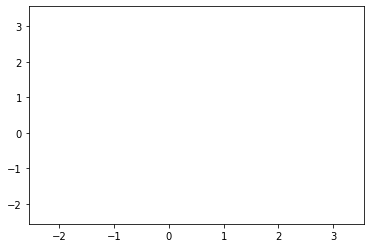

In [81]:
big_results = [r for r in results if r[4] > 50000]
for e, r in enumerate(big_results) :
    plt.plot()
    print(f'{e} - {r[1]} - {r[4]} - {r[2]}')

7852

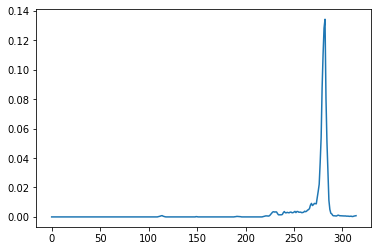

In [35]:
plt.plot(trends['439'])

In [32]:
trendstopics[439]

array(['#happyhalloween', '#trickortreat', '#halloweenathome',
       '#trickortreating', '#spooktober', '#allhallowseve'], dtype='<U75')

In [31]:
[t for t in topics for h in topics[t] if 'hallo' in h]

[439, 439, 439, 504, 504, 504, 504]

In [50]:
events

Index(['0', '6', '12', '16', '19', '22', '26', '28', '32', '36',
       ...
       '847', '848', '849', '851', '859', '863', '865', '866', '867', '868'],
      dtype='object', length=209)

In [49]:
results[0], trends[results[0]]

('0', 0.06593417748056489, 289, '2020-11-08')

In [47]:
gig_topics = [r for r in results if 

('0', 0.06593417748056489, 289, '2020-11-08')

 0 : 2020-06-01 -  #wajidkhan-#sajidwajid-#ripwajidkhan-#wajid-#wajidkhanpassedaway-#ripwajid-#musicdirector
 1 : 2020-05-16 -  #tharntypess2firstws-#แบมแบมของขล-#หมอก-#tzuyu_moreandmore-#300daysactorong-#staywithtaynew-#nontuberep11
 2 : 2020-06-07 -  #postpone_aiims11june-#postpone_aiims_11june-#postponeaiimspg-#postpone_midyear_exams-#postpone_aiims_11jun-#savedoctors11june
 3 : 2020-06-01 -  #postponetn10thexam-#wearejust15-#savethenextgentn-#postpone10thexam-#justicefortn10thexam-#plshelpstalin
 4 : 2020-02-20 -  #mondo-#ricercatori-#ricercapubblica-#precari-#diritto-#cambiamentoclimatico
 5 : 2020-05-21 -  #yg_respect_blackpink-#แบรนด-#brandsmorningcall-#lisaforhuaguoqingru-#yedam-#nct127_1m_seller_축하해-#makefriends_igot7
 6 : 2020-10-04 -  #mositidakpercaya-#gagalkanomnibuslaw-#tolakomnisbuslaw-#jegalsampaigagal-#tolakruuciptakerja-#dprrikhianatirakyat-#jegalsampaibatal-#batalkanomnibuslaw-#dpririkhianatirakyat
 7 : 2020-06-28 -  #save_gtu_students-#gtu-#masspromotion-#navinsethr

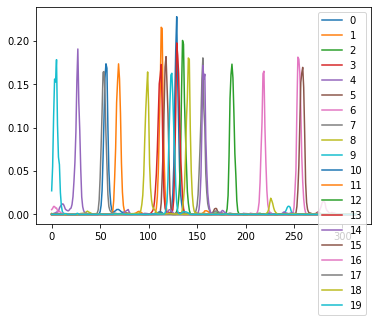

In [48]:
for e, r in enumerate(sorted(results, key=lambda x : -x[1])[:20]) :
    plt.plot(trends[r[0]], label = e)
    #plt.show()
    hashes = '-'.join(topics[int(r[0])])
    print(f'{e:2} : {r[-1]} -  {hashes}')
plt.legend()
plt.show()

110 2020-05-13


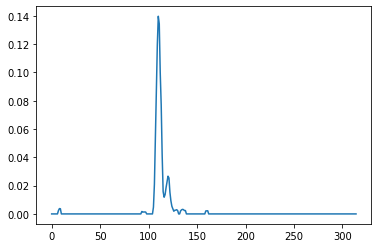

In [6]:
event = events[45]
date_idx, date = find_peak(event)
print(date_idx, date)
plt.plot(trends[event])

In [14]:
indices = []
for e in events :
    indices.append((e, find_peak(e)[0]))

(array([3., 0., 0., 0., 3., 0., 0., 1., 1., 0., 0., 2., 2., 0., 0., 4., 0.,
        0., 0., 0., 0., 0., 1., 0., 0., 0., 2., 0., 3., 3., 3., 0., 0., 0.,
        0., 2., 0., 0., 0., 0., 0., 0., 2., 0., 0., 0., 0., 0., 0., 1., 0.,
        0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 2., 1.,
        0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 2., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 2., 0., 0., 3., 1., 0., 0., 0., 1., 0., 2., 2., 0.,
        1., 0., 0., 3., 0., 4., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
        2., 2., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 2., 0., 2.,
        0., 0., 0., 1., 2., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        2., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 

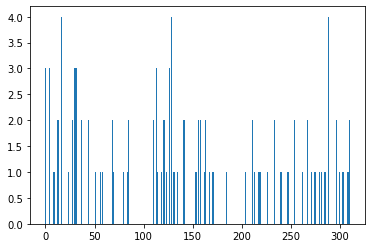

In [17]:
plt.hist([x[1] for x in indices], bins=300)

In [15]:
indices

[('8', 170),
 ('36', 289),
 ('53', 296),
 ('86', 0),
 ('90', 162),
 ('98', 141),
 ('101', 120),
 ('102', 158),
 ('103', 0),
 ('109', 163),
 ('125', 29),
 ('146', 141),
 ('147', 233),
 ('149', 142),
 ('154', 153),
 ('156', 254),
 ('160', 156),
 ('165', 233),
 ('166', 135),
 ('193', 267),
 ('202', 113),
 ('207', 30),
 ('208', 163),
 ('213', 310),
 ('221', 167),
 ('223', 226),
 ('229', 127),
 ('230', 152),
 ('234', 267),
 ('254', 58),
 ('259', 37),
 ('264', 218),
 ('271', 110),
 ('275', 114),
 ('277', 127),
 ('281', 124),
 ('284', 51),
 ('288', 184),
 ('291', 30),
 ('293', 282),
 ('316', 289),
 ('326', 32),
 ('327', 158),
 ('334', 120),
 ('335', 171),
 ('337', 110),
 ('339', 113),
 ('342', 29),
 ('366', 16),
 ('371', 239),
 ('373', 286),
 ('381', 289),
 ('385', 142),
 ('387', 84),
 ('391', 16),
 ('392', 5),
 ('407', 132),
 ('416', 131),
 ('420', 83),
 ('427', 13),
 ('431', 279),
 ('435', 211),
 ('436', 121),
 ('446', 44),
 ('447', 299),
 ('452', 29),
 ('458', 274),
 ('463', 156),
 ('464',

In [4]:
events

Index(['8', '36', '53', '86', '90', '98', '101', '102', '103', '109',
       ...
       '705', '706', '707', '708', '709', '710', '711', '718', '722', '727'],
      dtype='object', length=119)

In [10]:
trends.columns[events]

Index(['8', '36', '40', '53', '65', '71', '81', '86', '90', '94',
       ...
       '707', '708', '709', '710', '711', '716', '718', '722', '724', '727'],
      dtype='object', length=153)

['#halamadrid' '#themaskedsinger' '#lastnormalphoto' '#deprem'
 '#masterchef' '#fancamsareoverparty' '#survior2020' '#versuz']


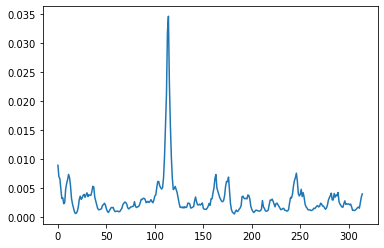

In [22]:
idx = 94 # 432
plt.plot(trends[str(idx)])
print(topics[idx])

In [14]:
for t in trends.columns[events][:15] :
    print(topics[int(t)])

['#saynotougcguidelines' '#noexamugc' '#promotefinalyearstudents'
 '#boycottugcguidelines' '#noexamincovid19' '#promotestudentsincovid'
 '#ugcguidelinesagainststudents' '#noexamsugc' '#postponeneetjee2020'
 '#noexamsmhrd' '#noexaminassam' '#postponedentalexamsap_ts'
 '#noofflineexam']
['#gaytravel' '#gaycouple' '#gayfuck' '#gaydaddy' '#gaylife' '#gaycum'
 '#gaylove' '#gayguys' '#indiansex' '#daddybear' '#gaybareback' '#gaydad'
 '#mancunt' '#desisex' '#indiangaysex' '#desichudai' '#hotgay']
['#standwithhongkong' '#hk' '#carrielam' '#hongkongers' '#fightforfreedom'
 '#standwithhk' '#hongkongpolice']
['#fordfailedontario' '#fordliedpeopledied' '#fireoosterhoff' '#fireford'
 '#fireelliott' '#worstpremierever' '#thisfuckingguy']
['#research' '#pneumonia' '#antibodies' '#antibody' '#infectiousdiseases'
 '#drugs' '#drug' '#researchers' '#evidence' '#clinical' '#trial']
['#salud' '#noticias' '#mundo' '#internacional' '#urgente' '#méxico'
 '#ultimahora' '#cdmx']
['#gis' '#screening' '#temperatu

In [9]:
len(trends['0'])

315

In [10]:
len(day_flux)

430

In [7]:
np.argmax(np.array(day_flux) > 300)

104

In [16]:
from scipy.signal import find_peaks

In [19]:
find_peaks(trends['716'], width=5)

(array([114, 169]),
 {'prominences': array([0.03948666, 0.00383597]),
  'left_bases': array([ 68, 168]),
  'right_bases': array([136, 176]),
  'widths': array([24.92793885,  6.88329237]),
  'width_heights': array([0.01974333, 0.00191799]),
  'left_ips': array([105.7374091, 168.5      ]),
  'right_ips': array([130.66534795, 175.38329237])})

array(['#bac', '#longdick', '#youngbbc', '#baits', '#moaning',
       '#asiandick', '#dickprint', '#fatdick', '#hungdick',
       '#africandick', '#asiancock', '#countrydick', '#creamydick',
       '#mexicandick', '#viraldick', '#dickandballs'], dtype='<U75')

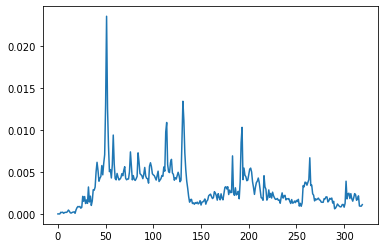

In [9]:
plt.plot(trends['1'])